In [43]:
# Import Packages
import numpy as np
import scipy.stats as stats
import os
import pickle as pk
import scipy.io as scio
from ncdump_python3 import ncdump
import pickle
import Area_Avg
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import griddata
from netCDF4 import Dataset
from ncdump_python3 import ncdump
mpl.rc('font',size=22)
mpl.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
mpl.rc('text', usetex=True)
plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [2]:
Fluxes_WAVD = pk.load(open('WAVD_dFlux_Vars.pickle','rb'),encoding='latin1')
Fluxes_RCP45 = pk.load(open('RCP45_dFlux_Vars.pickle','rb'),encoding='latin1')

In [3]:
dLOWCLOUD_RCP45_Ann = np.mean(Fluxes_RCP45['CLDLOW'],axis=(0,1))
dLOWCLOUD_WAVD_Ann = np.mean(Fluxes_WAVD['CLDLOW'],axis=(0,1))

In [4]:
dMEDCLOUD_RCP45_Ann = np.mean(Fluxes_RCP45['CLDMED'],axis=(0,1))
dMEDCLOUD_WAVD_Ann = np.mean(Fluxes_WAVD['CLDMED'],axis=(0,1))

In [5]:
dHGHCLOUD_RCP45_Ann = np.mean(Fluxes_RCP45['CLDHGH'],axis=(0,1))
dHGHCLOUD_WAVD_Ann = np.mean(Fluxes_WAVD['CLDHGH'],axis=(0,1))

In [6]:
#Load in Dimensions
LLL = Dataset('LatLon.nc')
WACCM4_Lat = np.squeeze(LLL.variables['lat'])
WACCM4_Lon = np.squeeze(LLL.variables['lon'])
LLL.close()

In [7]:
#modify longitude for basemap plotting
WACCM4_lon1 = WACCM4_Lon[1:73]
WACCM4_lon2 = WACCM4_Lon[72:144] - 360
WACCM4_Lon_new = np.hstack((WACCM4_lon2,WACCM4_lon1))

In [47]:
#define projection
xx, yy = np.meshgrid(WACCM4_Lon_new, WACCM4_Lat)
mm = Basemap(projection='npstere',boundinglat=10,lon_0=270,resolution='h')
mm1 = Basemap(projection='npstere',boundinglat=10,lon_0=270,resolution='h')
mm2 = Basemap(projection='npstere',boundinglat=10,lon_0=270,resolution='h')
mm3 = Basemap(projection='npstere',boundinglat=10,lon_0=270,resolution='h')
mm4 = Basemap(projection='npstere',boundinglat=10,lon_0=270,resolution='h')
mm5 = Basemap(projection='npstere',boundinglat=10,lon_0=270,resolution='h')
mm6 = Basemap(projection='npstere',boundinglat=10,lon_0=270,resolution='h')
x, y = mm(xx,yy) #converts rectangular meshgrid into meshgrid for the specific projection

In [9]:
dLOWCLOUD_RCP45_Ann_1 = dLOWCLOUD_RCP45_Ann[:,1:73] 
dLOWCLOUD_RCP45_Ann_2 = dLOWCLOUD_RCP45_Ann[:,72:144]
dLOWCLOUD_RCP45_Ann_new = np.concatenate((dLOWCLOUD_RCP45_Ann_2,dLOWCLOUD_RCP45_Ann_1),\
                                axis=1)

dLOWCLOUD_WAVD_Ann_1 = dLOWCLOUD_WAVD_Ann[:,1:73] 
dLOWCLOUD_WAVD_Ann_2 = dLOWCLOUD_WAVD_Ann[:,72:144]
dLOWCLOUD_WAVD_Ann_new = np.concatenate((dLOWCLOUD_WAVD_Ann_2,dLOWCLOUD_WAVD_Ann_1),\
                                axis=1)

In [10]:
dMEDCLOUD_RCP45_Ann_1 = dMEDCLOUD_RCP45_Ann[:,1:73] 
dMEDCLOUD_RCP45_Ann_2 = dMEDCLOUD_RCP45_Ann[:,72:144]
dMEDCLOUD_RCP45_Ann_new = np.concatenate((dMEDCLOUD_RCP45_Ann_2,dMEDCLOUD_RCP45_Ann_1),\
                                axis=1)

dMEDCLOUD_WAVD_Ann_1 = dMEDCLOUD_WAVD_Ann[:,1:73] 
dMEDCLOUD_WAVD_Ann_2 = dMEDCLOUD_WAVD_Ann[:,72:144]
dMEDCLOUD_WAVD_Ann_new = np.concatenate((dMEDCLOUD_WAVD_Ann_2,dMEDCLOUD_WAVD_Ann_1),\
                                axis=1)

In [11]:
dHGHCLOUD_RCP45_Ann_1 = dHGHCLOUD_RCP45_Ann[:,1:73] 
dHGHCLOUD_RCP45_Ann_2 = dHGHCLOUD_RCP45_Ann[:,72:144]
dHGHCLOUD_RCP45_Ann_new = np.concatenate((dHGHCLOUD_RCP45_Ann_2,dHGHCLOUD_RCP45_Ann_1),\
                                axis=1)

dHGHCLOUD_WAVD_Ann_1 = dHGHCLOUD_WAVD_Ann[:,1:73] 
dHGHCLOUD_WAVD_Ann_2 = dHGHCLOUD_WAVD_Ann[:,72:144]
dHGHCLOUD_WAVD_Ann_new = np.concatenate((dHGHCLOUD_WAVD_Ann_2,dHGHCLOUD_WAVD_Ann_1),\
                                axis=1)

In [12]:
dummy_data = np.zeros([96,144])

for i in range(144):
    dummy_data[:,i] = np.linspace(-0.1,0.1,96)

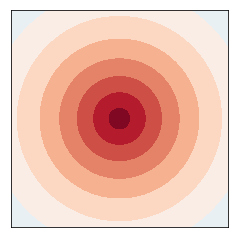

In [38]:
cmap_dummy = mm6.contourf(x,y,dummy_data,15,cmap='RdBu_r',extend='both')

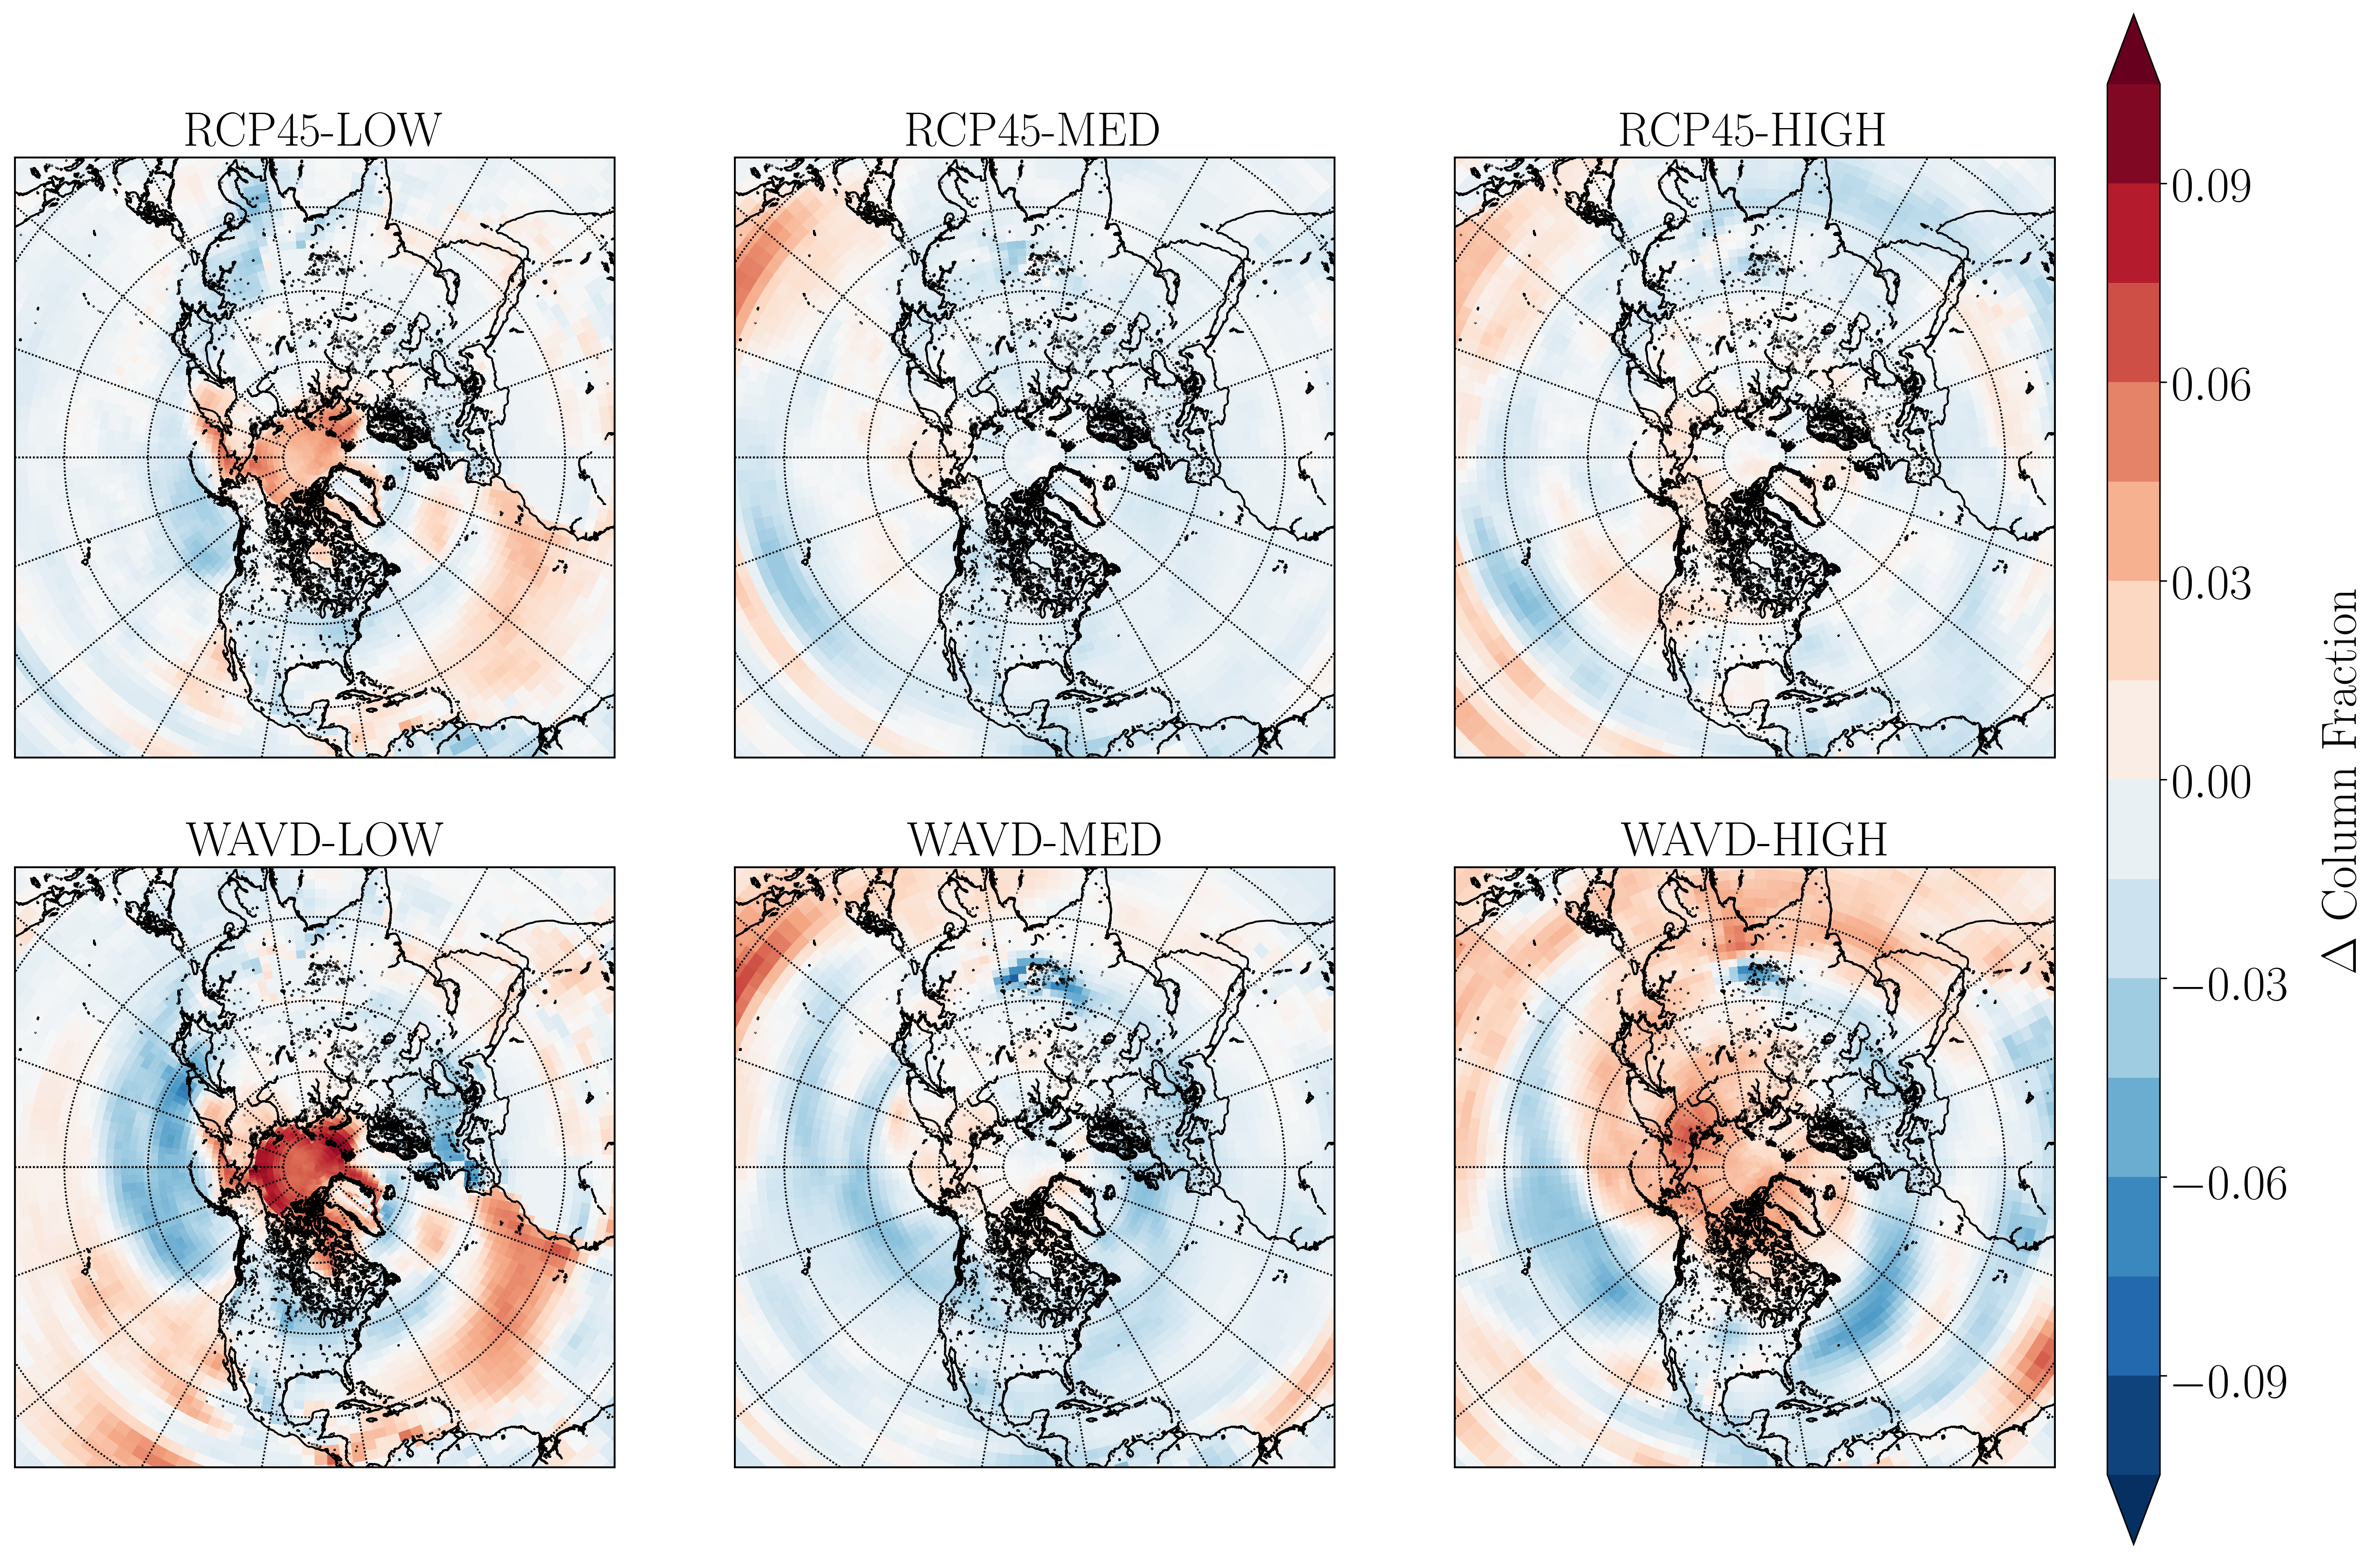

In [48]:
fig = plt.figure(figsize=(20,25),dpi=300)
#plt.suptitle('Ensemble, Annual Mean Change in Vertically Integrated Low Cloud Fraction',0.5)

plt.subplot(2,3,1)
plt.title('RCP45-LOW')
mm.drawparallels(np.arange(-80.,81.,20.))
mm.drawmeridians(np.arange(-180.,181.,20.));
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
pc1 = mm.pcolormesh(x,y, dLOWCLOUD_RCP45_Ann_new, cmap='RdBu_r')
plt.clim(-0.1,0.11)

plt.subplot(2,3,2)
plt.title('RCP45-MED')
mm1.drawparallels(np.arange(-80.,81.,20.))
mm1.drawmeridians(np.arange(-180.,181.,20.));
mm1.drawcoastlines()
mm1.drawmapboundary(fill_color='none')
pc2 = mm1.pcolormesh(x,y, dMEDCLOUD_RCP45_Ann_new, cmap='RdBu_r')
plt.clim(-0.1,0.11)

plt.subplot(2,3,3)
plt.title('RCP45-HIGH')
mm2.drawparallels(np.arange(-80.,81.,20.))
mm2.drawmeridians(np.arange(-180.,181.,20.));
mm2.drawcoastlines()
mm2.drawmapboundary(fill_color='none')
pc3 = mm2.pcolormesh(x,y, dHGHCLOUD_RCP45_Ann_new, cmap='RdBu_r')
plt.clim(-0.1,0.11)

plt.subplot(2,3,4)
plt.title('WAVD-LOW')
mm3.drawparallels(np.arange(-80.,81.,20.))
mm3.drawmeridians(np.arange(-180.,181.,20.));
mm3.drawcoastlines()
mm3.drawmapboundary(fill_color='none')
pc4 = mm3.pcolormesh(x,y, dLOWCLOUD_WAVD_Ann_new, cmap='RdBu_r')
plt.clim(-0.1,0.11)

plt.subplot(2,3,5)
plt.title('WAVD-MED')
mm4.drawparallels(np.arange(-80.,81.,20.))
mm4.drawmeridians(np.arange(-180.,181.,20.));
mm4.drawcoastlines()
mm4.drawmapboundary(fill_color='none')
pc5 = mm4.pcolormesh(x,y, dMEDCLOUD_WAVD_Ann_new, cmap='RdBu_r')
plt.clim(-0.1,0.11)

plt.subplot(2,3,6)
plt.title('WAVD-HIGH')
mm5.drawparallels(np.arange(-80.,81.,20.))
mm5.drawmeridians(np.arange(-180.,181.,20.));
mm5.drawcoastlines()
mm5.drawmapboundary(fill_color='none')
pc6 = mm5.pcolormesh(x,y, dHGHCLOUD_WAVD_Ann_new, cmap='RdBu_r')
plt.clim(-0.1,0.11)

plt.subplots_adjust(hspace=-0.6)

#add colorbar
fig.subplots_adjust(right=0.9)
cbar_ax2 = fig.add_axes([0.92, 0.28, 0.02, 0.465])
cbar = fig.colorbar(cmap_dummy,cbar_ax2)
cbar.set_label('$\Delta$ Column Fraction', fontsize=27, labelpad=15)
cbar.ax.tick_params(labelsize=27)

plt.savefig('Cloud_Plots.png',bbox_inches='tight')